<a href="https://www.kaggle.com/code/rever3nd/time-series?scriptVersionId=145535465" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
! pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 928.0/928.0 kB 33.8 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for peewee: filename=peewee-3.16.3-cp310-cp310-linux_x86_64.whl size=314460 sha256=9f0e095e2f0911744fce1419f43e81b748945a73703e3c75a308e07d8ac330d8
  Stored in directory: /root/.cache/pip/wheels/c8/ac/6d/ad6d828725ffbe3abc508c95d25dd0c5fcc63539ae47913790
Successfully built peewee


# Starting with Time Series

### Creating a Sample Time Series

In [3]:
import pandas as pd 
date = [pd.Timestamp("2017-01-01"),
        pd.Timestamp("2017-01-02"),
        pd.Timestamp("2017-01-03")]
timeSeries = pd.Series(np.random.randn(len(date)), index=date)


In [4]:
timeSeries.index = pd.DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03'], dtype='datetime64[ns]', freq=None)
timeSeries['2017-01-01']

-0.5925612207268215

### Frequency Business Days

In [5]:
pd.date_range(start='2017-01-01',end='2017-01-19',freq='B')

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-16', '2017-01-17',
               '2017-01-18', '2017-01-19'],
              dtype='datetime64[ns]', freq='B')

### Frequency Hours

In [6]:
pd.date_range(start="2017-01-01", periods=3, freq='H')

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

### Frequency Minutes

In [7]:
pd.date_range(start="2017-01-01", periods=3, freq='T')

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:01:00',
               '2017-01-01 00:02:00'],
              dtype='datetime64[ns]', freq='T')

### Frequency Seconds

In [8]:
pd.date_range(start="2017-01-01", periods=3, freq='S')

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:00:01',
               '2017-01-01 00:00:02'],
              dtype='datetime64[ns]', freq='S')

### Frequency Combination of Days/Hours/Minutes/seconds

In [9]:
pd.date_range(start="2017-01-01", periods=5, freq='1D1h1min10s')

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-02 01:01:10',
               '2017-01-03 02:02:20', '2017-01-04 03:03:30',
               '2017-01-05 04:04:40'],
              dtype='datetime64[ns]', freq='90070S')

### Frequency Week-Friday

In [10]:
pd.date_range(start="2017-01-01", periods=5, freq='W-FRI')

DatetimeIndex(['2017-01-06', '2017-01-13', '2017-01-20', '2017-01-27',
               '2017-02-03'],
              dtype='datetime64[ns]', freq='W-FRI')

### Combining Frequency indexes
-  First 10 Business Days for January
- Last 10 Business Days for February

In [11]:
a = pd.date_range(start="2017-01-01", periods=10, freq='BAS-JAN')
b = pd.date_range(start="2017-01-01", periods=10, freq='A-FEB')
a.union(b)

DatetimeIndex(['2017-01-02', '2017-02-28', '2018-01-01', '2018-02-28',
               '2019-01-01', '2019-02-28', '2020-01-01', '2020-02-29',
               '2021-01-01', '2021-02-28', '2022-01-03', '2022-02-28',
               '2023-01-02', '2023-02-28', '2024-01-01', '2024-02-29',
               '2025-01-01', '2025-02-28', '2026-01-01', '2026-02-28'],
              dtype='datetime64[ns]', freq=None)

# Sampling


### DownSample Scenario

In [12]:
customerArrival = pd.date_range('18/09/2017 8:00', periods=600, freq='T')
custArrivalTs = pd.Series(np.random.randint(0, 100, len(customerArrival)), index=customerArrival)
custArrivalTs.head(10)


2017-09-18 08:00:00    91
2017-09-18 08:01:00    24
2017-09-18 08:02:00    62
2017-09-18 08:03:00    41
2017-09-18 08:04:00    43
2017-09-18 08:05:00    60
2017-09-18 08:06:00    30
2017-09-18 08:07:00     3
2017-09-18 08:08:00     1
2017-09-18 08:09:00    74
Freq: T, dtype: int64

In [13]:
custArrivalTs.resample('10min').mean().head()

2017-09-18 08:00:00    42.9
2017-09-18 08:10:00    46.9
2017-09-18 08:20:00    38.8
2017-09-18 08:30:00    60.8
2017-09-18 08:40:00    57.6
Freq: 10T, dtype: float64

#### Custom Aggregation

In [14]:
custArrivalTs.resample('10min').sum().head()

2017-09-18 08:00:00    429
2017-09-18 08:10:00    469
2017-09-18 08:20:00    388
2017-09-18 08:30:00    608
2017-09-18 08:40:00    576
Freq: 10T, dtype: int64

In [15]:
custArrivalTs.resample('1h').max().head()

2017-09-18 08:00:00    98
2017-09-18 09:00:00    98
2017-09-18 10:00:00    98
2017-09-18 11:00:00    98
2017-09-18 12:00:00    99
Freq: H, dtype: int64

In [16]:
import random
custArrivalTs.resample('1h').apply(lambda m: random.choice(m)).head()

2017-09-18 08:00:00    10
2017-09-18 09:00:00    24
2017-09-18 10:00:00     1
2017-09-18 11:00:00     2
2017-09-18 12:00:00     1
Freq: H, dtype: int64

### Open High Low Close
- you are analyzing customer incidence data. You would wish to see the opening, closing, high and low incidence values in a given interval of time.


In [17]:
custArrivalTs.resample('1h').apply('ohlc').head()

,open,high,low,close
2017-09-18 08:00:00,91,98,1,7
2017-09-18 09:00:00,98,98,5,30
2017-09-18 10:00:00,22,98,0,25
2017-09-18 11:00:00,94,98,1,2
2017-09-18 12:00:00,50,99,1,80


### Upsampling Scenario

In [18]:
sampleRng = pd.date_range('9/18/2017 8:00', periods=10, freq='H')
sampleTs = pd.Series(np.random.randint(0, 100, len(sampleRng)), index=sampleRng)
sampleTs

2017-09-18 08:00:00    20
2017-09-18 09:00:00    89
2017-09-18 10:00:00    83
2017-09-18 11:00:00    64
2017-09-18 12:00:00     8
2017-09-18 13:00:00    11
2017-09-18 14:00:00    44
2017-09-18 15:00:00    97
2017-09-18 16:00:00    17
2017-09-18 17:00:00    86
Freq: H, dtype: int64

In [19]:
sampleTs.resample('15min').mean().head(10)


2017-09-18 08:00:00    20.0
2017-09-18 08:15:00     NaN
2017-09-18 08:30:00     NaN
2017-09-18 08:45:00     NaN
2017-09-18 09:00:00    89.0
2017-09-18 09:15:00     NaN
2017-09-18 09:30:00     NaN
2017-09-18 09:45:00     NaN
2017-09-18 10:00:00    83.0
2017-09-18 10:15:00     NaN
Freq: 15T, dtype: float64

### Filling NaN(s) with forward fill

In [20]:
sampleTs = sampleTs.resample('15min')
sampleTs.ffill().head(10)

2017-09-18 08:00:00    20
2017-09-18 08:15:00    20
2017-09-18 08:30:00    20
2017-09-18 08:45:00    20
2017-09-18 09:00:00    89
2017-09-18 09:15:00    89
2017-09-18 09:30:00    89
2017-09-18 09:45:00    89
2017-09-18 10:00:00    83
2017-09-18 10:15:00    83
Freq: 15T, dtype: int64

### Filling NaN(s) with backward fill

In [21]:
# sampleTs = sampleTs.resample('15min')
# sampleTs.bfill().head()

In [22]:
#sampleTs.resample('15min').ffill(limit=2).head()

### Interpolation

In [23]:
#interEx = sampleTs.resample('15min')

#interEx.interpolate().head(10)

# Time Zones


In [24]:
import pytz 
pytz.common_timezones[-5:]


['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [25]:
usEastTz = pytz.timezone('US/Eastern')
usEastTz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

### Localizing time series

In [26]:

timeZoneRng = pd.date_range('9/18/2017 9:30', periods=6, freq='D',tz='UTC')
timeZoneTs = pd.Series(np.random.randn(len(timeZoneRng)), index=timeZoneRng)
timeZoneTs.index.tz

datetime.timezone.utc

In [27]:
timeZoneTs


2017-09-18 09:30:00+00:00    0.160719
2017-09-19 09:30:00+00:00    1.365543
2017-09-20 09:30:00+00:00   -0.686934
2017-09-21 09:30:00+00:00   -1.054369
2017-09-22 09:30:00+00:00   -1.293142
2017-09-23 09:30:00+00:00    0.715765
Freq: D, dtype: float64

In [28]:
timeZoneTs.tz_convert('US/Eastern')


2017-09-18 05:30:00-04:00    0.160719
2017-09-19 05:30:00-04:00    1.365543
2017-09-20 05:30:00-04:00   -0.686934
2017-09-21 05:30:00-04:00   -1.054369
2017-09-22 05:30:00-04:00   -1.293142
2017-09-23 05:30:00-04:00    0.715765
Freq: D, dtype: float64

### Using timestamp

In [29]:
sampleTimeStamp =  pd.Timestamp('2011-09-19 04:00')
timeStamp_utc = sampleTimeStamp.tz_localize('UTC')
timeStamp_utc

Timestamp('2011-09-19 04:00:00+0000', tz='UTC')

In [30]:
timeStamp_utc.tz_convert('US/Eastern')

Timestamp('2011-09-19 00:00:00-0400', tz='US/Eastern')

### Daylight savings

In [31]:
# 30 minutes before DST transition
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [32]:
stamp + Hour()


Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [33]:
# 90 minutes before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp


Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [34]:
stamp + 2 * Hour()


Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Combining different timezones

In [35]:
dateRng = pd.date_range('9/19/2017 9:30', periods=10, freq='B')
timeSeries =  pd.Series(np.random.randn(len(dateRng)), index=dateRng)
tz1 = timeSeries[:7].tz_localize('Asia/Singapore')
tz2 = tz1[2:].tz_convert('Asia/Seoul')
combine = tz1 + tz2
combine.index

DatetimeIndex(['2017-09-19 01:30:00+00:00', '2017-09-20 01:30:00+00:00',
               '2017-09-21 01:30:00+00:00', '2017-09-22 01:30:00+00:00',
               '2017-09-25 01:30:00+00:00', '2017-09-26 01:30:00+00:00',
               '2017-09-27 01:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

# TimeSeries Plotting

In [36]:
%matplotlib inline 
random.seed(10)
sampleRng = pd.date_range(start='2017', periods=120, freq='MS')
sampleTs = pd.Series(np.random.randint(-10, 10, size=len(sampleRng)), sampleRng).cumsum()
sampleTs.head()

2017-01-01   -3
2017-02-01   -6
2017-03-01   -4
2017-04-01   -6
2017-05-01   -4
Freq: MS, dtype: int64

### Basic Plot

<Axes: title={'center': 'Sample time series'}>

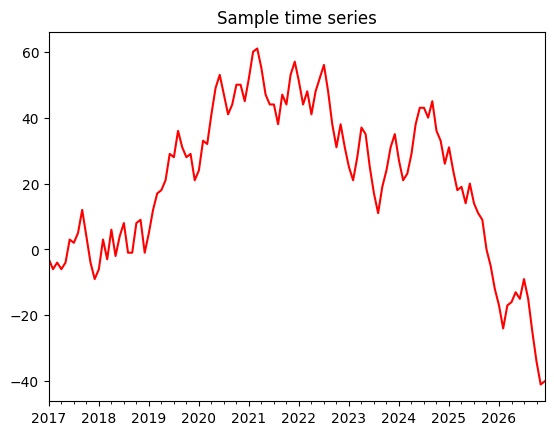

In [37]:
sampleTs.plot(c='r', title='Sample time series')

### Aggregation Plot

<Axes: title={'center': 'Sample time series'}>

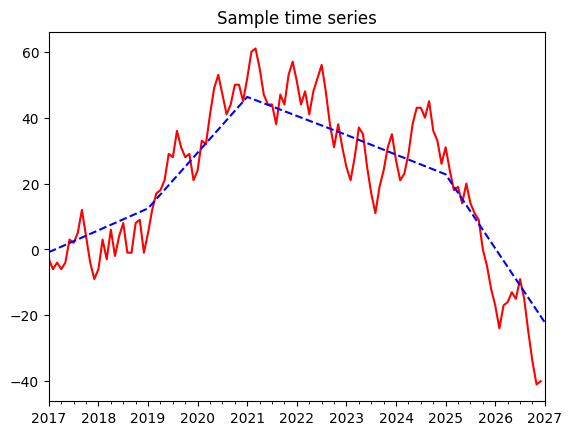

In [38]:
sampleTs.plot(c='r', title='Sample time series')
sampleTs.resample('2A').mean().plot(c='b', ls='--')

<Axes: title={'center': 'Sample time series'}>

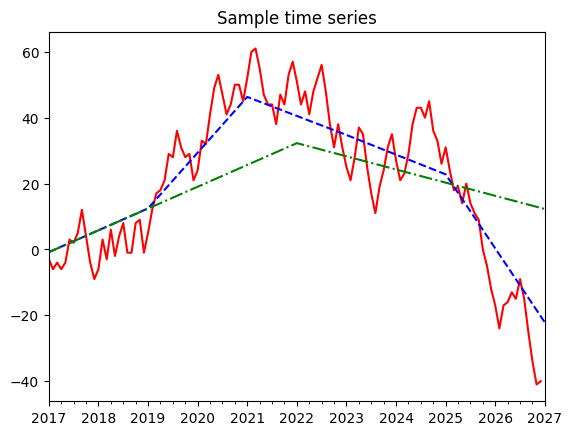

In [39]:
sampleTs.plot(c='r', title='Sample time series')
sampleTs.resample('2A').mean().plot(c='b', ls='--')
sampleTs.resample('5A').mean().plot(c='g', ls='-.')

### Lag Plot
The Lag Plot is a very important and useful visualization for Time Series Data.

Time Series is a Univariate Data.

In the lag plot, you plotted the actual data against the data with a time lag. This helps in determining how the current data is predicting the future data.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

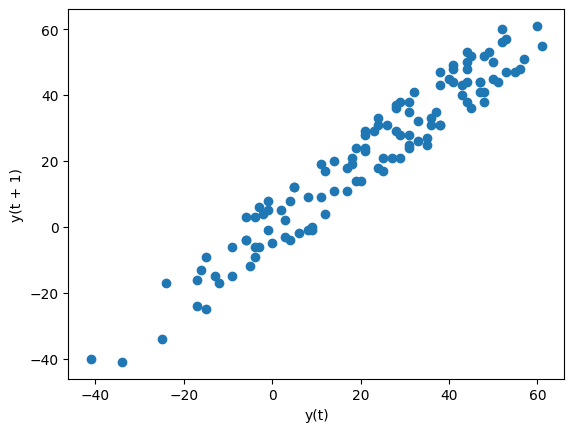

In [40]:
from pandas.plotting import lag_plot
lag_plot(sampleTs)

### Auto Correlation Function
Auto Correlation is a very important step in Time Series Model Building

- *The ACF plot is a very useful graph while performing Time Series Modeling*
- *It tell the correlation value for each lag*
- *An ideal ACF plot will decay exponentially*
- *Depending on the ACF plot value , you can decide to stop at any given lag*

In [41]:
import yfinance as yf

appleData = yf.download('AAPL', start='2021-01-01', end='2022-01-01')
print(appleData.head())

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  133.520004  133.610001  126.760002  129.410004  127.331703   
2021-01-05  128.889999  131.740005  128.429993  131.009995  128.905975   
2021-01-06  127.720001  131.050003  126.379997  126.599998  124.566826   
2021-01-07  128.360001  131.630005  127.860001  130.919998  128.817444   
2021-01-08  132.429993  132.630005  130.229996  132.050003  129.929306   

               Volume  
Date                   
2021-01-04  143301900  
2021-01-05   97664900  
2021-01-06  155088000  
2021-01-07  109578200  
2021-01-08  105158200  


The above data set has the stock prices of APPLE Inc. It is a Series of Open, High, Low , Close, Adj stock prices for a given data.
Plotting the ACF Values for various lags


[ 1.00000000e+00  9.74918713e-01  9.50034277e-01  9.23836061e-01
  8.99715541e-01  8.74602017e-01  8.52932021e-01  8.30571052e-01
  8.10207278e-01  7.91617878e-01  7.72337509e-01  7.50718711e-01
  7.22762022e-01  6.96946481e-01  6.72888593e-01  6.46661078e-01
  6.22574888e-01  5.94550211e-01  5.70470907e-01  5.49834789e-01
  5.32671835e-01  5.17405439e-01  5.02574756e-01  4.86046668e-01
  4.72552656e-01  4.60975287e-01  4.46690582e-01  4.32073969e-01
  4.17980010e-01  4.04391859e-01  3.93246205e-01  3.85235481e-01
  3.79178037e-01  3.73506947e-01  3.66941085e-01  3.61247472e-01
  3.55501671e-01  3.48522907e-01  3.40707426e-01  3.31399501e-01
  3.23772596e-01  3.16458206e-01  3.09216930e-01  3.01792947e-01
  2.92813782e-01  2.84742248e-01  2.79081382e-01  2.73029851e-01
  2.66902313e-01  2.61266801e-01  2.55766183e-01  2.50976503e-01
  2.46932309e-01  2.43340223e-01  2.40052319e-01  2.34293575e-01
  2.31168338e-01  2.28453524e-01  2.24335158e-01  2.20465315e-01
  2.15134920e-01  2.12034

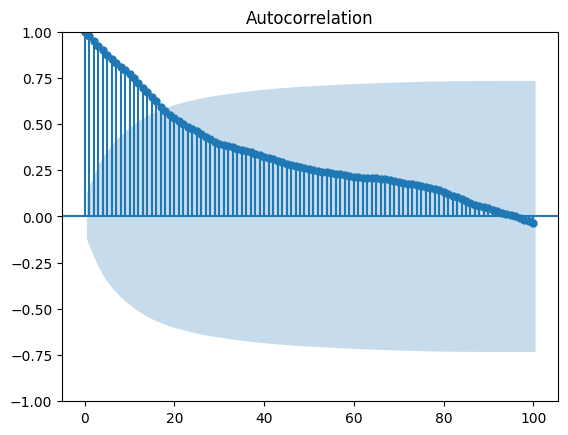

In [42]:
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
acf_corr = sm.tsa.acf(appleData.Close, nlags=100)
plot_acf(appleData.Close,lags=100)
print(acf_corr)
plt.show()

- Fitting ACF is the first step during Model Building
- Depending on the pattern you can decide what should be the order of the Auto Regression process

### Auto Correlation Plot
In the lag plot, we have just seen how the data is scattered when plotted against one-time lag.

- Autocorrelation plot goes one step further.

- Auto Correlation refers to correlating the data with itself. Here we are correlating the data with a one-time lag.

- The plot gives a more accurate picture of how the data point is correlated among themselves.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

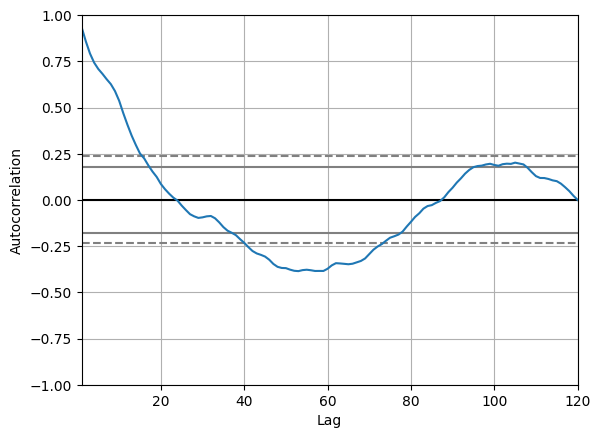

In [43]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sampleTs)

### Partial Auto Correlation (PACF)

- Partial Auto Correlation is another important step in the Time Series Modeling Process
- The partial auto correlation at any given lag k is the correlation obtained after cancelling the effect of correlations due to terms at shorter lags.
- In simple terms , in partial auto correlation , the effects due to intermediate terms are nullified to determine the correlation
- If you have a time series that is represented by [yt , yt-1 , yt-2 , .... yt-s]
- If you want to determine the Partial Auto Correlation between yt and yt-s then you have to nullify the effect of all intermediate terms to get the PACF value

[ 1.          0.97880285 -0.01002435 -0.04656877  0.03428863 -0.03783536
  0.06549501 -0.02722059  0.02781726  0.0395095  -0.03840433]


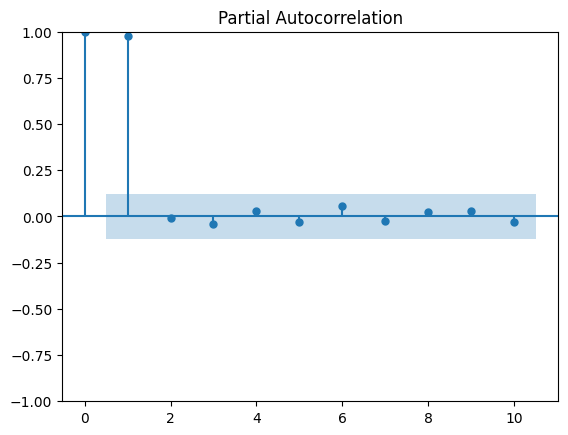

In [44]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf_corr = sm.tsa.pacf(appleData.Close, nlags=10)
plot_pacf(appleData.Close,lags=10)
print(pacf_corr)
plt.show()

- The PACF plot has lag on X axis and correlation value on Y axis.
- Reading the PACF Plot we will understand the number of significant lags to determine the order of AR Process.
- From the plot in the previous card , it is evident that the order of AR will be 2 for the time series.

# Stationarity
Stationarity is a very significant property in Time Series Analysis. In Time series, data is collected at different time intervals. The data might behave in a deterministic or stochastic nature.

### What is Stationarity?
- In statistical terms, the mean, variance and the temporal correlation remain constant over time.

- A simpler definition is that there are no seasonal or trend components in the time series.

### Augmented Dickey - Fuller test
ADF test is the best way to determine if the time series data is stationary or not.

This kind of test is known as Unit Root Test.

The main objective of this test is that it identifies how the trend component determines the time series.

In [45]:
from statsmodels.tsa.stattools import adfuller
sampleRng = pd.date_range(start='2017', periods=120, freq='MS')
sampleTs = pd.Series(np.random.randint(-10, 10, size=len(sampleRng)), sampleRng).cumsum()
tsResult = adfuller(sampleTs)
print('ADF Statistic: %f' % tsResult[0])
print('p-value: %f' % tsResult[1])
for key, value in tsResult[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.064397
p-value: 0.729059
	1%: -3.487
	5%: -2.886
	10%: -2.580


*he more negative the ADF statistic value is the more likely the data is stationary.*

*The ADF Statistic should be compared to critical p-values that are at 1, 5, and 10%.*

*If the ADF statistic value is less than the critical value at 5% and the p-value is less than 0.05, then we can reject the null hypothesis that the data is non-stationary with 95% confidence level.*

### Case Study

**The dataset we are using is dow jones index data for different stock values.**

In [46]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip > data.zip

curl: /opt/conda/lib/libcurl.so.4: no version information available (required by curl)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35074    0 35074    0     0  46701      0 --:--:-- --:--:-- --:--:-- 46703


In [47]:
!unzip data.zip 

Archive:  data.zip
  inflating: dow_jones_index.data    
  inflating: dow_jones_index.names   


In [48]:
dataFrame = pd.read_csv('/kaggle/working/dow_jones_index.data',parse_dates=["date"], index_col="date")

#### Scenario 1: Performing stationary test on WMT opening Stock prices. 

In [49]:
open_WMT_Ts = dataFrame[(dataFrame.stock == 'WMT')].open.str.replace('$',' ').astype(float)


In [50]:
open_WMT_Ts.head()

date
2011-01-07    54.23
2011-01-14    53.65
2011-01-21    55.11
2011-01-28    55.39
2011-02-04    56.45
Name: open, dtype: float64

In [51]:
tsResult1 = adfuller(open_WMT_Ts)
print('ADF Statistic: %f' % tsResult1[0])
print('p-value: %f' % tsResult1[1])
for key, value in tsResult1[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.892828
p-value: 0.002088
	1%: -3.924
	5%: -3.068
	10%: -2.674


**As ADF Statistic is negative and p-value is less than 0.05, the times series is not-stationary.**

#### Scenario 2: Performing stationary test on XOM closing Stock prices. 

In [52]:
close_XOM_Ts = dataFrame[(dataFrame.stock == 'XOM')].close.str.replace('$',' ').astype(float)

In [53]:
tsResult2 = adfuller(close_XOM_Ts)
print('ADF Statistic: %f' % tsResult2[0])
print('p-value: %f' % tsResult2[1])
for key, value in tsResult2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.913251
p-value: 0.993261
	1%: -3.964
	5%: -3.085
	10%: -2.682


**As ADF Statistic is positive and p-value is more than 0.05, the times series is not-stationary.**

# Components of Time Series Data

Time Series data is not just what it is.
There are several components underlying it. They are

- Trend
- Seasonal
- Cycle
- Random

### Steps in Time Series Analysis
Few steps to be followed while performing time series analysis:

1. Check for Stationarity.
1. Decompose the model into its various components.
1. Analyse the components.
1. Fit the time series forecasting model and predict future values.

### Seasonal Decomposition

In [54]:

from statsmodels.tsa.seasonal import seasonal_decompose
sampleTs_decomp = seasonal_decompose(sampleTs) 
sampleTs_trend = sampleTs_decomp.trend 
sampleTs_seasonal = sampleTs_decomp.seasonal 
sampleTs_residual = sampleTs_decomp.resid

### Actual Time Series

<Axes: >

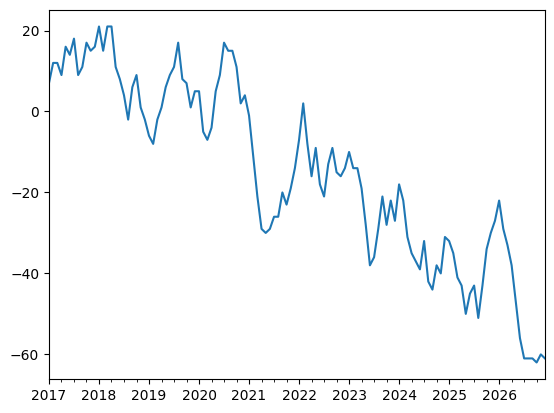

In [55]:
sampleTs.plot()

### Visualizing the Decomposition - Trends

<Axes: >

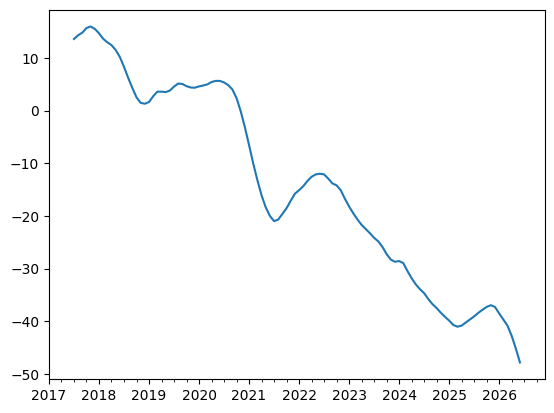

In [56]:
sampleTs_trend.plot()

### Visualizing the Decomposition - Seasons

<Axes: >

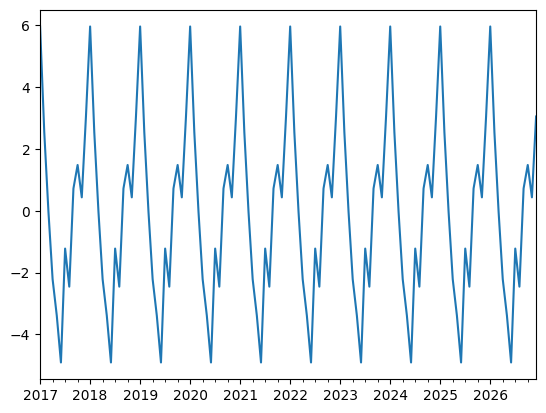

In [57]:
sampleTs_seasonal.plot()

### Visualizing the Decomposition - Random Component

<Axes: >

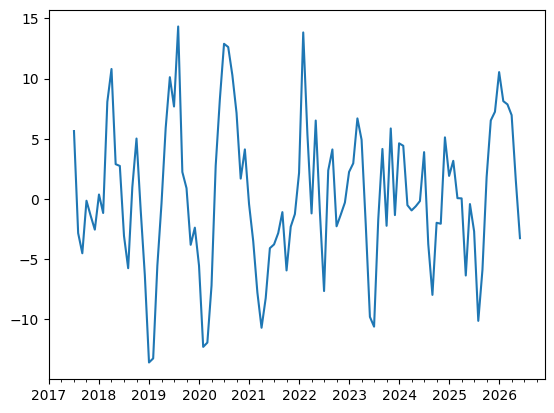

In [58]:
sampleTs_residual.plot()

# Modelling Time Series

### Auto Regression

- In Autoregression, you use the current value of the variable to predict its future values.
- Here, the current and past time stamp values of the time series are used to predict the future values.
- Regression is the process of predicting one variable from another .
- In Time Series , the data points collected are from the same observation.
- Here the past observations are used for predicting the future values.
- This process of regressing the past values to get the future values is known as Auto Regression.
- The lag values should help in predicting the current and the future values
- Stronger the correlation between the current and the past values, more robust the predictions from Auto Regression

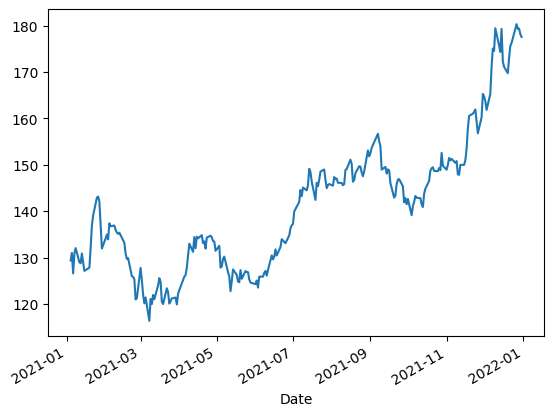

In [59]:
appleData.Close.plot()
plt.show()

**Splitting the Data**

In [60]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

X = appleData.Close.values
train, test = X[1:len(X)-10], X[len(X)-10:]


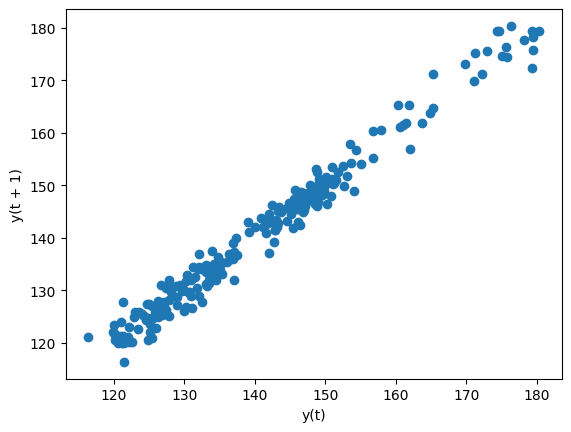

In [61]:

lag_plot(appleData.Close)
plt.show()

**The plot shows good correlation with 1 lag**

#### Correlogram

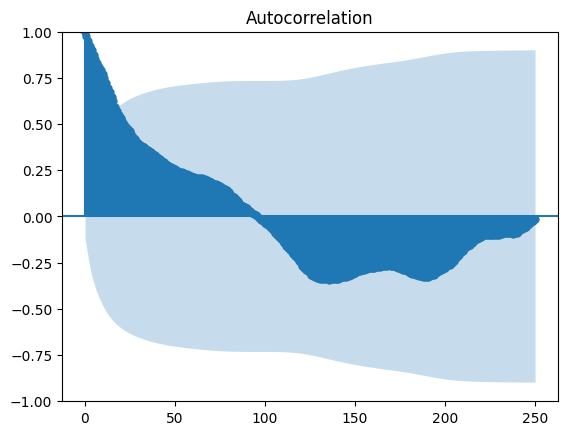

In [62]:

plot_acf(appleData.Close,lags = 250)
plt.show()

#### Model Fitting

In [63]:
model = AutoReg(train, lags=25)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


Coefficients: [ 0.1162279   0.92979062  0.03252849  0.00407993  0.10749263 -0.07995041
  0.18527982 -0.16449399 -0.06791103  0.05809004 -0.01084152  0.14768245
 -0.07826931 -0.1857853   0.21458577 -0.04019215  0.06684185 -0.21369842
 -0.01497029  0.08719783 -0.1599547   0.06314107  0.16813062 -0.07225645
  0.07049088 -0.04667724]


predicted=170.376230, expected=171.139999
predicted=170.107345, expected=169.750000
predicted=171.727807, expected=172.990005
predicted=172.721223, expected=175.639999
predicted=173.252985, expected=176.279999
predicted=172.105749, expected=180.330002
predicted=172.474872, expected=179.289993
predicted=172.693395, expected=179.380005
predicted=172.756003, expected=178.199997
predicted=174.297015, expected=177.570007
Test MSE: 21.913


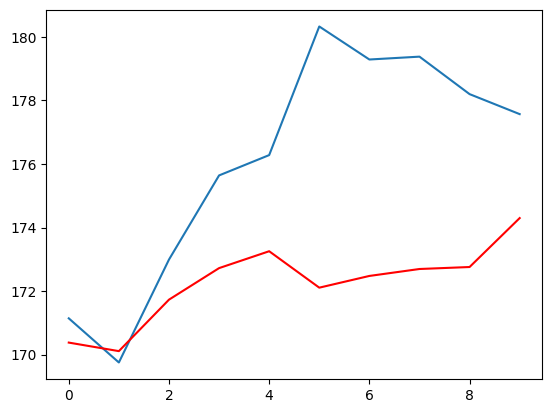

In [64]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

- *we are performing forecasting for the time series based on the length.*
- *We are also viewing the Mean Square Error and plotting the actuals vs predicted values.*

### Moving Average Smoothing
- Moving Average is a smoothing technique for reducing the noise in the Time Series Data
- It is used for exposing the signal that is in-between the noise
- The values are averaged at different time windows
- Moving average is another way to predict the time series data.
- Here the dependent variable is expressed as a function of the previous values along with an average component.
- Average component keeps moving along the time series.



#### Centered Moving Average

In Centered Moving average , the average is calculated for time steps before and after the given time step

**cma(t) = average(obs(t-1), obs(t), obs(t+1))**

- This method requires the **know how of the future values** to calculate the average.
- This technique is used for **detrending** and **removing any seasonal effects** on Time Series Data.
- This is **not** very useful **for forecasting**.

#### Trailing Moving Average
Trailing Moving Average uses *historical observations* for determining the *future observation.*

**trail_moving_average(t) = average(obs(t-2), obs(t-1), obs(t))**

In [65]:
from pandas import Series
seriesData = Series(appleData.Close.values)
rolling = seriesData.rolling(window=3)
rolling_mean = rolling.mean()
rolling_mean.head(10)

0           NaN
1           NaN
2    129.006666
3    129.509997
4    129.856667
5    130.649999
6    129.943334
7    129.556666
8    129.533335
9    128.980001
dtype: float64

*we are keeping the window size of 3 and moving across the time series to calculate the arithmetic mean.*

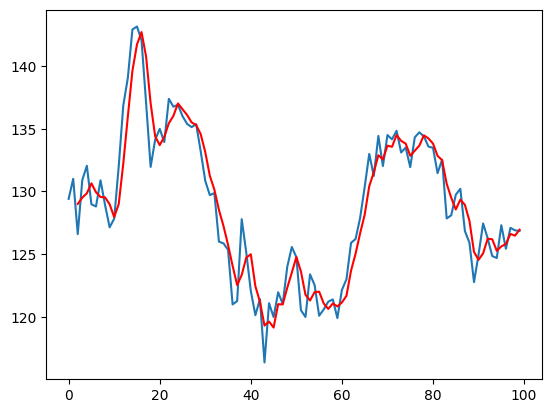

In [66]:
seriesData.head(100).plot()
rolling_mean.head(100).plot(color='red')
plt.show()

**The Actual data is in Blue and the rolling mean is in Red. You can see how the data is smoother now.**

#### plotting with moving Average
- Moving Average can be used for prediction
- It is not a very effective way to predict but can still be used to get a naive estimate
- The assumption we make is that the trend and seasonal components are nullified
- This can be used in a Walk Forward Manner

In [67]:
from numpy import mean

X = appleData.Close.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
for yhat, obs in zip(predictions[:15], history[:15]):
    print('predicted=%f, expected=%f' % (yhat, obs))

#print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=129.006666, expected=129.410004
predicted=129.509997, expected=131.009995
predicted=129.856667, expected=126.599998
predicted=130.649999, expected=130.919998
predicted=129.943334, expected=132.050003
predicted=129.556666, expected=128.979996
predicted=129.533335, expected=128.800003
predicted=128.980001, expected=130.889999
predicted=127.960002, expected=128.910004
predicted=129.000000, expected=127.139999
predicted=132.243332, expected=127.830002
predicted=135.990000, expected=132.029999
predicted=139.620000, expected=136.869995
predicted=141.716670, expected=139.070007
predicted=142.713333, expected=142.919998
Test MSE: 7.478


#### plotting the results

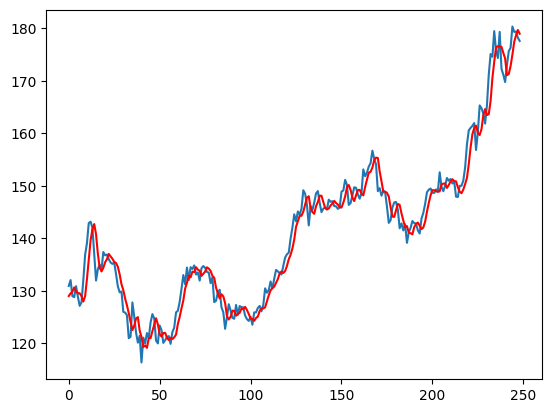

In [68]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


#### A More Granular View

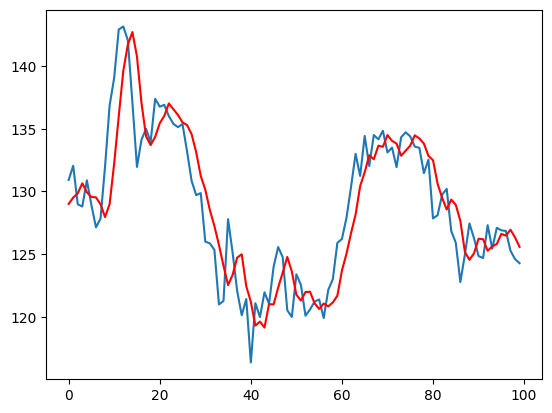

In [69]:
plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')
plt.show()


### Selecting p and q
- The **p** and **q** parameters of the Autoregressive and Moving Average models. These parameters have to be selected by how they fit the historical data.
- The AIC(Akaike Information Criterion) or BIC(Bayesian Information Criterion) have to be validated among the results and the model which has the lowest value should be chosen.


### ARIMA
- ARIMA is the combination of Autoregressive and Moving Average.
- ARIMA stands for Autoregressive Integrated Moving Average.
- AR: Autoregression. Model that uses the past values to predict the future values
- I: Integrated. Making use of difference to make the data stationary
- MA: Moving Average.A model that makes use of historical observations from a moving average model
- It is another model used for forecasting in Time Series Analysis.


#### Model Representation

The standard representation of an ARIMA model is ARIMA(p,d,q)

- p the number of lag observations also called as lag order
- d number of observations that are differenced, degree of difference
- q order of moving average or the size of the moving average window

#### ARIMA Process

- Data is prepared by the degree of differencing to make it stationary
- A linear regression model is prepared based on the specified type and the number of terms
- One assumption is that the process that generated the observations is also an ARIMA process

In [70]:
from statsmodels.tsa.arima.model import ARIMA 
# Auto Regression with ARIMA
model = ARIMA(sampleTs, order=(1, 1, 0)) 
predValues = model.fit()
predValues.params

ar.L1      0.104635
sigma2    31.878922
dtype: float64

In [71]:
# Moving Average with ARIMA
model = ARIMA(sampleTs, order=(0, 1, 1)) 
movingAvgRes = model.fit() 
movingAvgRes.params

ma.L1      0.104441
sigma2    31.882568
dtype: float64

In [72]:
# ARIMA model
model = ARIMA(sampleTs, order=(1, 0, 1)) 
arimares = model.fit() 

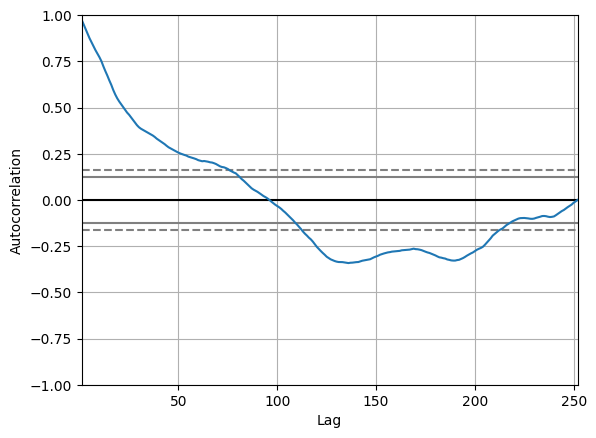

In [73]:
appleCloseTs = appleData.Close
autocorrelation_plot(appleCloseTs)
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  252
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -555.069
Date:                Sat, 07 Oct 2023   AIC                           1122.137
Time:                        03:28:33   BIC                           1143.290
Sample:                             0   HQIC                          1130.650
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0106      0.055     -0.192      0.848      -0.119       0.097
ar.L2         -0.0220      0.061     -0.359      0.720      -0.142       0.098
ar.L3         -0.0496      0.061     -0.816      0.4

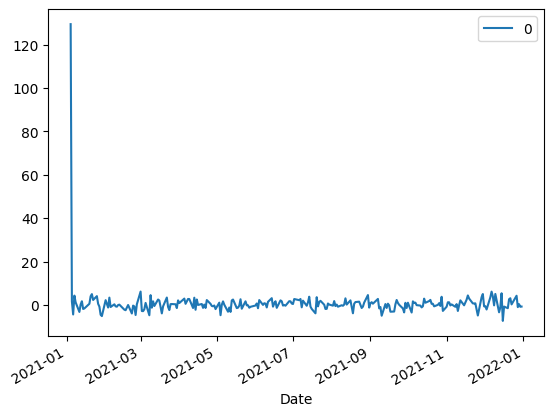

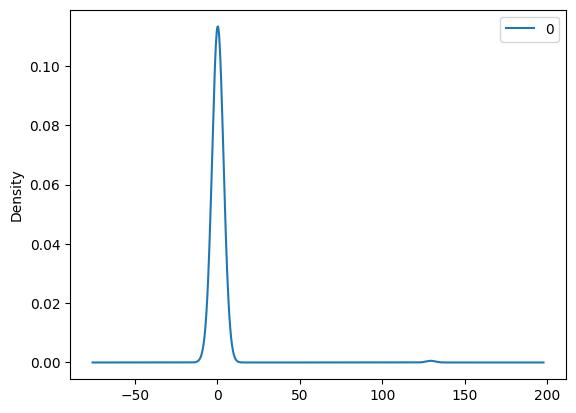

                0
count  252.000000
mean     0.727925
std      8.430236
min     -7.350852
25%     -0.970697
50%      0.166094
75%      1.658787
max    129.410004


In [74]:
model = ARIMA(appleCloseTs, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())


#### Forecasting

In [75]:
X = appleCloseTs.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):

    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

for yhat, obs in zip(predictions[:15], history[:15]):
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=152.952564, expected=129.410004
predicted=151.663202, expected=131.009995
predicted=152.507908, expected=126.599998
predicted=153.956067, expected=130.919998
predicted=153.300134, expected=132.050003
predicted=156.811902, expected=128.979996
predicted=155.015428, expected=128.800003
predicted=153.928485, expected=130.889999
predicted=149.325697, expected=128.910004
predicted=149.311737, expected=127.139999
predicted=148.643417, expected=127.830002
predicted=148.692111, expected=132.029999
predicted=149.719452, expected=136.869995
predicted=145.848993, expected=139.070007
predicted=143.351477, expected=142.919998


Test MSE: 6.104


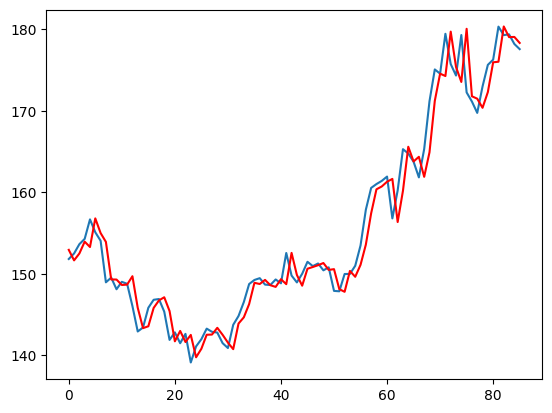

In [76]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

**The actual values are in Blue and predicted value in Red.**

### Vector Auto Regression (VAR) - Multi-Variate Time Series Analysis
- So far you have learnt that time series is univariate and the current values predict the future values.
- Sometimes there might be external phenomenon that affect a time series in more than one way
- Vector Auto Regression is a multivariate generalization of a uni variate auto regressive time series model
- Multivariate linear time series models
- They are designed to capture the collective dynamics of multiple time series

**Loading the data set.**

In [77]:
import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.tsa.api import VAR


mdata = sm.datasets.macrodata.load_pandas().data

**Wrangling the data**

In [78]:
from statsmodels.tsa.base.datetools import dates_from_str

dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
quarterly = dates_from_str(quarterly)
mdata = mdata[['realgdp','realcons','realinv']]
mdata.index = pandas.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()

**Fitting the model**

In [79]:
model = VAR(data)
results = model.fit(2)
results.summary()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 07, Oct, 2023
Time:                     03:28:45
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.172
L1.realgdp         -0.279435         0.169663           -1.647           0.100
L1.realcons         0.675016         0.131285            5.142    

**Visualizing the results**

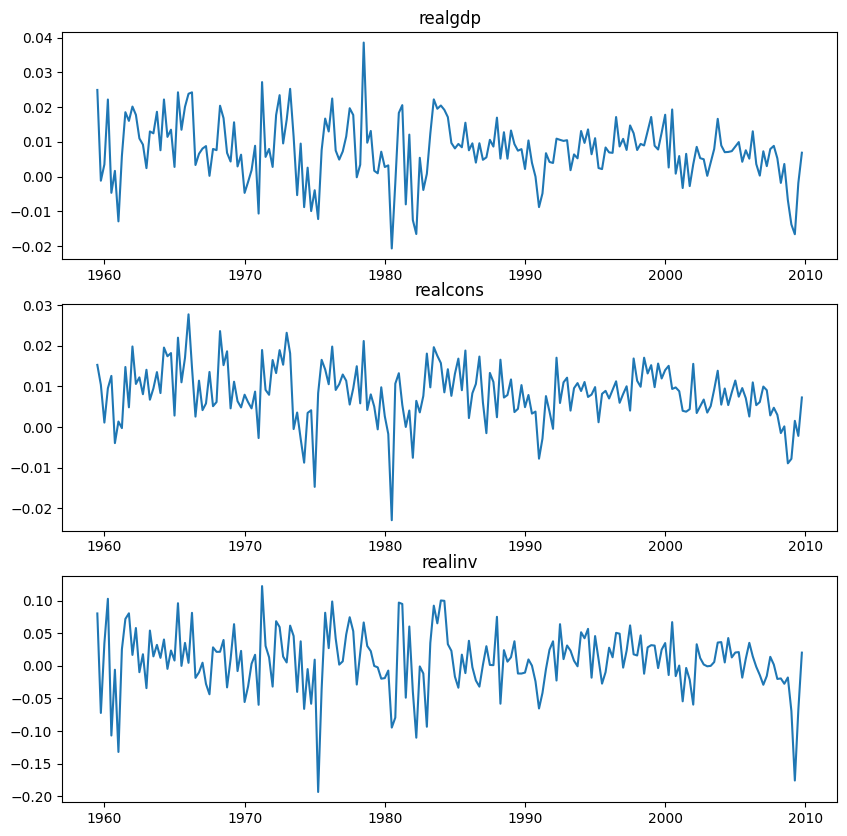

In [80]:
results.plot()
plt.show()

**Creating forecasts**

In [81]:
lag_order = results.k_ar

results.forecast(data.values[-lag_order:], 5)


array([[ 0.00502587,  0.0053712 ,  0.0051154 ],
       [ 0.00593683,  0.00784779, -0.00302473],
       [ 0.00662889,  0.00764349,  0.00393308],
       [ 0.00731516,  0.00797044,  0.00657495],
       [ 0.00732726,  0.00808811,  0.00649793]])

**Visualizing forecasts**

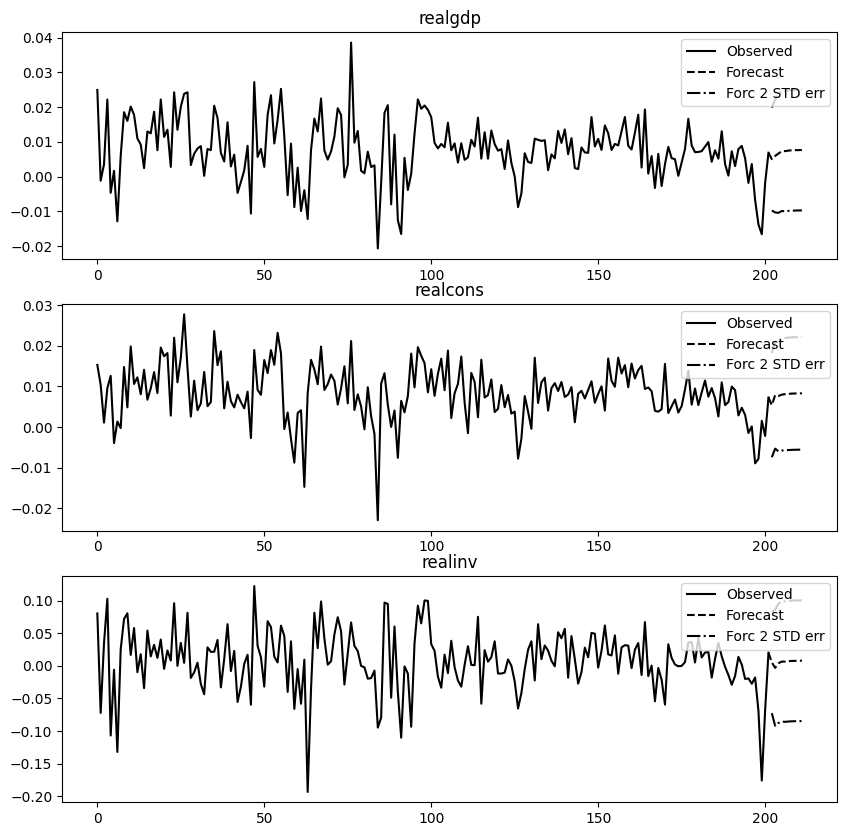

In [82]:
results.plot_forecast(10)

plt.show()

### Weighted/Exponential Smoothing
- In time series forecasting , while predicting the future value , all the past values may not equally contribute
- Value at lag 1 will contribute more than the remaining values , hence it is a good approach to assign weights that decay to each of the values that are a time step apart and use that to predict the future value
- One limitation to the approach is if the sum of the weights are greater than 1 then the prediction accuracy might not be good.
- To overcome this limitation , we go for an approach where the sum of the weights is 1

In [83]:
timeSeries = [30,21,29,31,40,48,53,47,37,39,31,29,17,9,20,24,27,35,41,38,27,31,27,26,21,13,21,18,33,35,40,36,22,24,21,20,17,14,17,19,26,29,40,31,20,24,18,26,17,9,17,21,28,32,46,33,23,28,22,27,18,8,17,21,31,34,44,38,31,30,26,32]

ts = Series(timeSeries)

In [84]:
def exp_smth(ts, alpha):
    result = [ts[0]] # first value is same as series
    for n in range(1, len(ts)):
        result.append(alpha * ts[n] + (1 - alpha) * result[n-1])
    return result


In [85]:
exp_smth(ts,0.1)

[30,
 29.1,
 29.090000000000003,
 29.281000000000006,
 30.352900000000005,
 32.117610000000006,
 34.20584900000001,
 35.48526410000001,
 35.63673769000001,
 35.97306392100001,
 35.47575752890001,
 34.82818177601001,
 33.04536359840901,
 30.64082723856811,
 29.5767445147113,
 29.01907006324017,
 28.817163056916154,
 29.43544675122454,
 30.591902076102087,
 31.33271186849188,
 30.89944068164269,
 30.909496613478424,
 30.51854695213058,
 30.066692256917523,
 29.160023031225773,
 27.544020728103195,
 26.889618655292878,
 26.000656789763593,
 26.700591110787233,
 27.53053199970851,
 28.77747879973766,
 29.4997309197639,
 28.74975782778751,
 28.274782045008756,
 27.547303840507883,
 26.792573456457095,
 25.813316110811385,
 24.631984499730248,
 23.868786049757222,
 23.3819074447815,
 23.64371670030335,
 24.17934503027302,
 25.76141052724572,
 26.285269474521147,
 25.65674252706903,
 25.491068274362128,
 24.741961446925917,
 24.867765302233327,
 24.080988772009995,
 22.572889894808995,
 22.01

In [86]:
exp_smth(ts,0.9)

[30,
 21.900000000000002,
 28.290000000000003,
 30.729000000000003,
 39.0729,
 47.10729,
 52.410729,
 47.5410729,
 38.054107290000005,
 38.905410729,
 31.7905410729,
 29.27905410729,
 18.227905410729,
 9.9227905410729,
 18.99227905410729,
 23.49922790541073,
 26.649922790541073,
 34.164992279054104,
 40.31649922790541,
 38.231649922790545,
 28.123164992279055,
 30.712316499227907,
 27.37123164992279,
 26.137123164992282,
 21.51371231649923,
 13.851371231649924,
 20.285137123164994,
 18.2285137123165,
 31.52285137123165,
 34.652285137123165,
 39.46522851371232,
 36.34652285137123,
 23.434652285137123,
 23.943465228513713,
 21.294346522851374,
 20.129434652285138,
 17.312943465228514,
 14.331294346522851,
 16.733129434652284,
 18.77331294346523,
 25.277331294346524,
 28.627733129434652,
 38.86277331294347,
 31.786277331294347,
 21.178627733129435,
 23.717862773312945,
 18.57178627733129,
 25.257178627733133,
 17.825717862773313,
 9.88257178627733,
 16.288257178627735,
 20.528825717862777

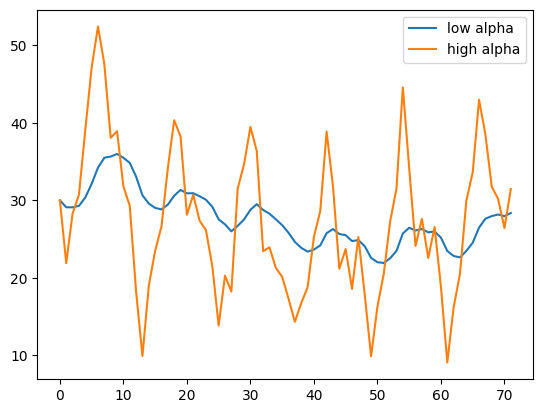

In [87]:
plt.plot(exp_smth(ts,0.1))
plt.plot(exp_smth(ts,0.9))
plt.legend(['low alpha', 'high alpha'])